# Lab | Regression Analysis

### Import libraries here:

In [ ]:
# Your code here

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Challenge 1
- I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. 
- In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

## Creating dataframe
Use this command to create the dataframe.
```python
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
```

In [ ]:
# Your code here

In [2]:
student_data = pd.DataFrame({'StudentID': [i for i in range(1, 11)],
                             'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

## Plot your data
- Use  `sns.scatterplot` to plot `Age` vs `Tardies` 

In [ ]:
# Your code here

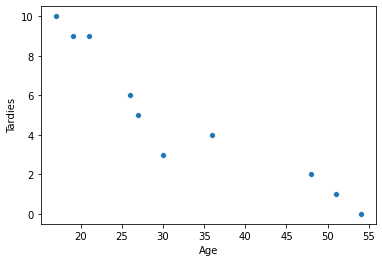

In [3]:
sns.scatterplot(x = 'Age',
                y = 'Tardies',
                data = student_data)
plt.show()

- You can also use `sns.pairplot()`.
- This plot the pairwise relationships in a dataset.

In [ ]:
# Your code here

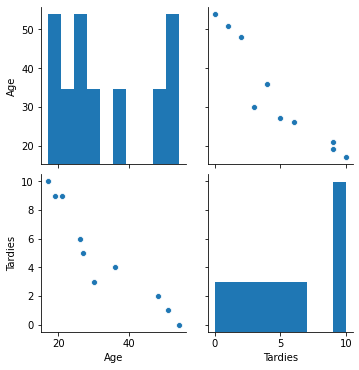

In [4]:
sns.pairplot(student_data[['Age', 'Tardies']])
plt.show()

- Do you see a trend?
- Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your answer here

In [ ]:
# The chart above presents a trend of a negative relationship between 'Age' and 'Tardies'
# It means that younger are those who tend to be the laters.

## Covariance and correlation

- Calculate the covariance and correlation of the variables. 
- Use `.cov()` and  `.corr()`.
- What is the difference between these two measures?

In [ ]:
# Your code here

In [5]:
student_data[['Age', 'Tardies']].cov()
# covariance indicates the level to which two variables vary together

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
student_data[['Age', 'Tardies']].corr()
# correlation returns the direction and the strengh between two variable

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


## Linear regression

- Build a linear regression model for this data. 
- You can use scikit-learn library.
```python
from sklearn.linear_model import LinearRegression
```

### Select variables
- Select you `X` and `y` variables.
- `X` will be your independent variable. **"Age"**
- `y` will be your dependent variable. **"Tardies"**

In [ ]:
# Your code here

In [7]:
X = student_data[['Age']]
y = student_data['Tardies']

### Train and test
- Split the data into train and test:
- `X_train`, `X_test`, `y_train`, `y_test`

In [ ]:
# Your code here

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

### Modeling
- Instantiate the LinearRegression class

In [ ]:
# Your code here

In [9]:
model = LinearRegression()

### Fit the model 
- Fit the model, the algorithm will learn about the data pattern

In [ ]:
# Your code here

In [10]:
model.fit(X_train, y_train)

LinearRegression()

### Prediction
- Predict the y_test that we splitted.
- Save in a variable called `y_pred_test`

In [ ]:
# Your code here

In [11]:
y_pred_test = model.predict(X_test)
y_pred_test

array([7.70032573, 5.61889251, 8.16286645])

### Evaluate (test)
- Use the metrics below to evaluate your model and predict data.
- Use the y_test and y_pred_test
```python
from sklearn.metrics import mean_squared_error, r2_score
```

In [ ]:
# Your code here

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
mean_squared_error(y_test, y_pred_test)

3.0828479170424448

In [14]:
r2_score(y_test, y_pred_test)

0.6146440103696944

### Coefficient and intercept
- Use `model.coef_` and `model.intercept_` to return both values.
- Can you interpret the values?

In [ ]:
# Your code here

In [15]:
# coefficient, represented by 'b'
b = model.coef_
b

array([-0.23127036])

In [16]:
# intercept, represented by 'm'
m = model.intercept_
m

12.557003257328992

- This is the linear regression equation:
__y= mX + b__
> * y: target variable
> * X: feature variables
- coefficient of -0.24: it means that for every unit of change in X (age), the change in y (tardie) is about 24% in a negative direction. 
- In other words: for every year of increasing in age, it will represent a decrease of 24% in tardies.

### Visualize the results
- Use the model that you created to predict the tardies. You will use `X`
- Include predictable tardies into the dataframe.

In [ ]:
# Your code here

In [17]:
y_pred = model.predict(X)
student_data['pred_tardies'] = y_pred

In [18]:
student_data

,StudentID,Age,Tardies,pred_tardies
0,1,17,10,8.625407
1,2,51,1,0.762215
2,3,27,5,6.312704
3,4,21,9,7.700326
4,5,36,4,4.231270
5,6,48,2,1.456026
6,7,19,9,8.162866
7,8,26,6,6.543974
8,9,54,0,0.068404
9,10,30,3,5.618893


### Plot
- You can use the code below:
- Add the ticks and labels.
```python
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
```

In [ ]:
# Your code here

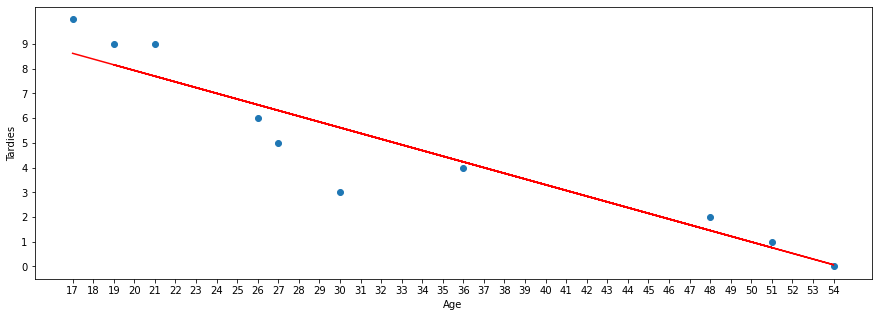

In [19]:
plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')
# set the ticks
plt.yticks(np.arange(0, 10, step=1))
plt.xticks(np.arange(17, 55, step=1))
plt.show()

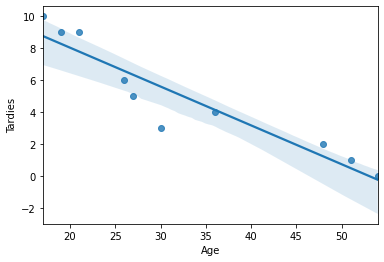

In [20]:
# You can also use sns.regplot()
sns.regplot(x='Age',
            y='Tardies',
            data=student_data)
plt.show()

_______________________________________

# Challenge 2

- In this challenge you will use `vehicles.csv` dataset.
- This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions.
- The goal of this exercise is to predict `vehicles CO2 emissions` based on several independent variables. 

### Read csv file

In [ ]:
# Your code here

In [21]:
vehicles = pd.read_csv('data/vehicles.csv')

In [22]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Correlations
- Use the variables `Year`, `Cylinders`, `Fuel Barrels/Year`, `Combined MPG`, and `Fuel Cost/Year`.
- Plot the pairwise relationships between columns. You can use `sns.pairplot()`
- Calculate the correlations between each of these variables and the outcome. You can use `.corr()`.
- Analyze which variable is the most important in determining `CO2 Emission Grams/Mile`

In [ ]:
# Your code here

In [23]:
vehicles_n = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
vehicles_n.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


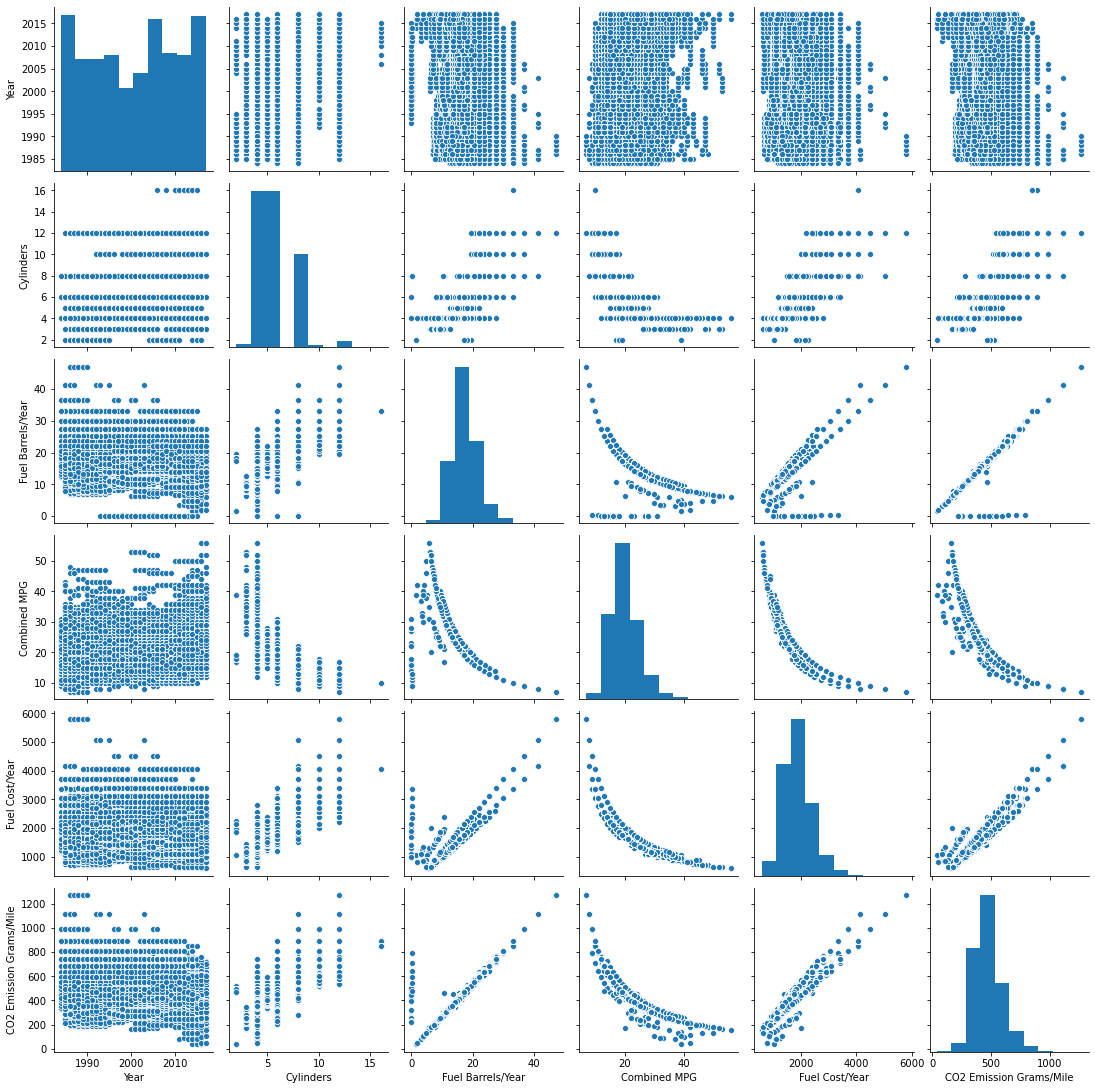

In [24]:
sns.pairplot(vehicles_n)

In [25]:
vehicles_n.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


### Linear regression
- Build a linear regression to predict the `CO2 Emission Grams/Mile`

In [ ]:
# Your code here

In [26]:
# pre processing
X = vehicles_n.drop('CO2 Emission Grams/Mile', axis=1)
y = vehicles_n['CO2 Emission Grams/Mile']

In [27]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

In [28]:
# modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting (X_test)

In [ ]:
# Your code here

In [29]:
y_pred = model.predict(X_test)

### Evaluate
- Use `mean_squared_error()` and `r2_score()`.
- Use variables `y_test` and `y_pred`

In [ ]:
# Your code here

In [30]:
mean_squared_error(y_test, y_pred)

195.5185554928741

In [31]:
r2_score(y_test, y_pred)

0.9862766721034467